In [54]:
import pandas as pd 
import datetime

from finquant.portfolio import build_portfolio
from finquant.efficient_frontier import EfficientFrontier
from finquant.moving_average import compute_ma, ema

import matplotlib 
import matplotlib.pylab as plt
matplotlib.rcParams['figure.figsize'] = (25.0,15.0)


In [55]:
# CREATE PORTAFOLIO
### Add your portafolio, enter the how many stocks and crypto you want to add to your portafolio analizer
### enter the name, the amount or shares and the price paid for the asset.

stock_inputs = int(input("Enter the total amount of stocks youll like to analyze"))
stock_dic = {}
for i in range(stock_inputs):
    stocks_name = input("Enter the ticker name of your assets").split()
    name_key = stocks_name[0]



year = int(input('Enter a year for start date: '))   #year for start date
month = int(input('Enter a month for start date: ')) #month for start date
day = int(input('Enter a day for start date: '))     #day for start date

# use datetime for start_date and end_date
start_date = datetime.datetime(year, month, day)
end_date = datetime.datetime.now()

Enter the total amount of stocks youll like to analyze 5
Enter the ticker name of your assets tsla
Enter the ticker name of your assets qqq
Enter the ticker name of your assets spy
Enter the ticker name of your assets aapl
Enter the ticker name of your assets meta
Enter a year for start date:  2010
Enter a month for start date:  1
Enter a day for start date:  1


[*********************100%***********************]  3 of 3 completed


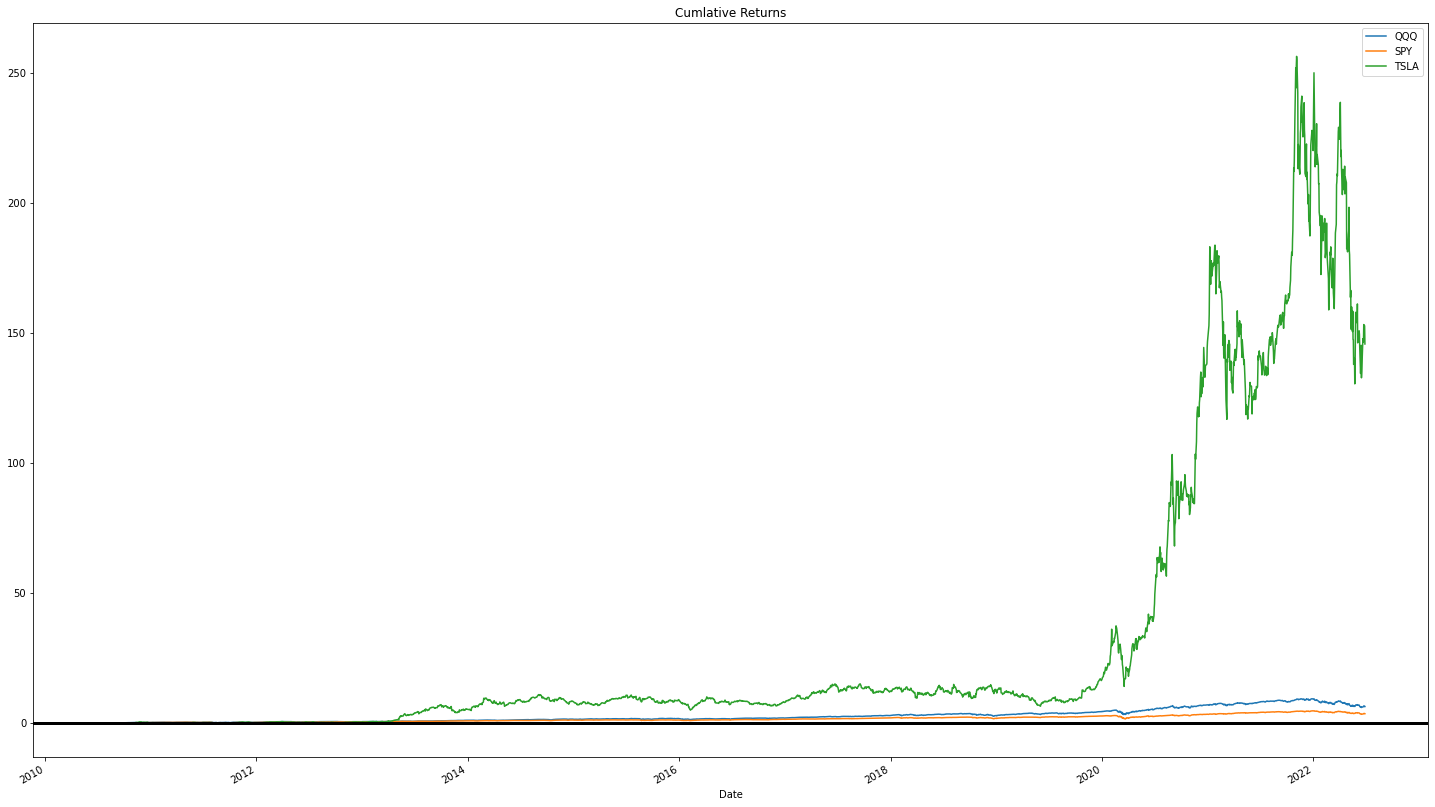

In [56]:
# Use build_protfolio from finquant with yahoo finance as data api otherwise it will use quandl
pf = build_portfolio(names=stock_names,start_date=start_date, end_date=end_date, data_api="yfinance")

pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)
plt.title('Cumlative Returns')
plt.show()

In [82]:


pf.properties()

----------------------------------------------------------------------
Stocks: QQQ, SPY, TSLA
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.295
Portfolio Volatility: 0.270
Portfolio Sharpe Ratio: 1.075

Skewness:
        QQQ       SPY      TSLA
0  1.123536  0.803126  2.168692

Kurtosis:
        QQQ      SPY      TSLA
0  0.241681 -0.20644  3.424614

Information:
   Allocation  Name
0    0.333333   QQQ
1    0.333333   SPY
2    0.333333  TSLA
----------------------------------------------------------------------


In [ ]:
# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=50000000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()
plt.show()

print(' ')
print('optimised portfolio results')
# creating an instance of EfficientFrontier
ef = EfficientFrontier(pf.comp_mean_returns(freq=1), pf.comp_cov())
# optimisation for minimum volatility
print(ef.minimum_volatility())


In [ ]:
ma = pf.compute_ma(dis, ema, spans, plot=True)
